In [38]:
import random
import matplotlib.pyplot as plt


class Bandit: 
  def __init__(self,n,prob=0):
    self.N=n #number of arms
    if prob==0:
      self.P=[0]*n #prob
      for i in range(n):
        self.P[i]=random.random()
    else:
      self.P=prob
    

  # returns the possible actions
  def actions(self):
    actions=list(range(self.N))
    return actions

  # returns reward when you pulled the arm/action
  def reward(self,arm):
    r=random.random()
    if r < self.P[arm]:
      return 1
    else:
      return 0    


In [46]:
import numpy as np
def epsilon_greedy(bandit,epsilon,iterations):
  Q=[0]*bandit.N # Q denotes value returned when taken action a
  ct=[0]*bandit.N # Count for number of times each arm were pulled in case of binary arm1 and arm2 were pulled
  total_reward = 0  # total reward accumulated so far
  avgrpi = []  # list to store the average reward per iteration
  rpi=[]
  all_estimates = np.zeros((iterations, bandit.N)) # array of Q which stores estimates for each iteration

  
  for i in range(iterations):
    rand=random.random()
    arm=0; # arm to be pulled   

    if rand <= epsilon:
      arm = random.choice(bandit.actions())
    else:
      arm = Q.index(max(Q))  # choose the arm with highest value 
    
    reward = bandit.reward(arm)
    rpi.append(reward)
    ct[arm] += 1 # increase the count
    Q[arm] += (1/ct[arm])*(reward-Q[arm]) # using the eqn Q(n+1) = Q(n)+(1/n)(reward-Q[n])
    all_estimates[i]=Q #stores estimates individually at each step
    total_reward += reward  # accumulate the reward
    # calculate the average reward per iteration and append it to the list
    avgrpi.append(total_reward / (i + 1))
    # plotting the graphs
  

  print(f'Actual Rewards probability of the bandit {[round(num, 3) for num in bandit.P] }')
  print(f'Probability Reward observed from bandit: {[round(num, 3) for num in Q]}')
  print(f'Number of times each arm were pulled     {ct} ')
  fig = plt.figure(figsize=(4, 3))
  # plt.bar(x, ct)
  plt.title('Number of times each action was taken')
  plt.xlabel('Action')
  plt.ylabel('Count')
  plt.show()
  

  fig = plt.figure(figsize=(4,3))
  for i in range(bandit.N):
      plt.plot(range(iterations), all_estimates[:, i], label=f'Arm {i+1}')
  plt.xlabel('Iteration')
  plt.ylabel('Estimated reward')
  plt.title('Estimated rewards over time for each arm of the bandit')
  plt.legend()

  fig = plt.figure(figsize=(4, 3))
  plt.plot(rpi)
  plt.xlabel('Iteration')
  plt.ylabel('reward')
  plt.show()
  
  fig = plt.figure(figsize=(4, 3))
  plt.plot(avgrpi)
  plt.xlabel('Iteration')
  plt.ylabel('Average reward')  
  return Q,ct


In [40]:
binary_bandit=Bandit(2)

Actual Rewards probability of the bandit [0.572, 0.465]
Probability Reward observed from bandit: [0.576, 0.34]
Number of times each arm were pulled     [953, 47] 


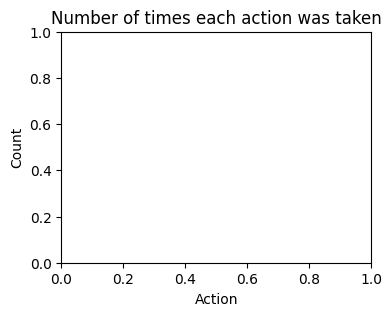

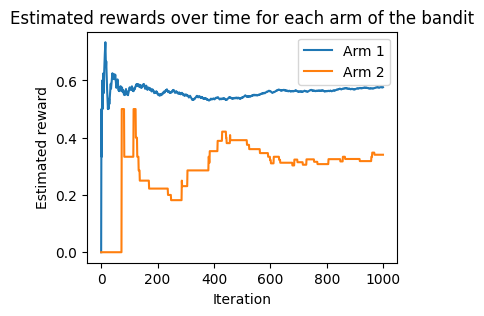

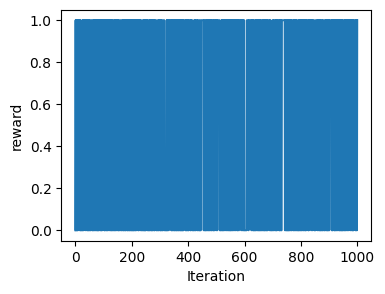

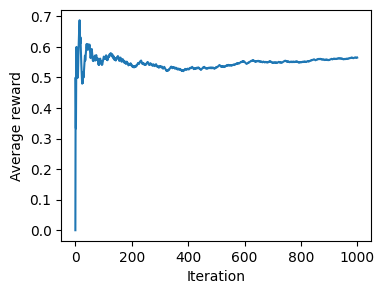

In [47]:
epsilon= 0.1
iterations = 1000
Q,ct=epsilon_greedy(binary_bandit,epsilon,iterations)